# Clasificación de texto

Tutorial de *scikit-learn*: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

Vamos a clasificar una serie de textos pertenecientes a las siguientes categorías:

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

print(twenty_train.target_names)
print(len(twenty_train.data))
print("\n".join(twenty_train.data[0].split("\n")[:3]))

for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
2257
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

Una vez obtenido el dataset, vamos a implementar un modelo simple de Naive Bayes.

In [30]:
from sklearn.naive_bayes import MultinomialNB 

classifier = MultinomialNB()
classifier.fit(X_train_tf,twenty_train.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
classifier.feature_count_[0,:10]

array([0.06425124, 1.22446147, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03671115, 0.        ])

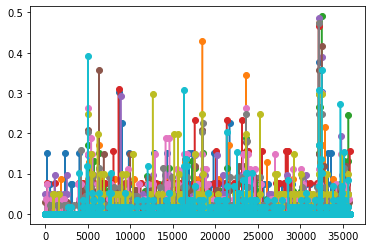

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(10):
    ax.plot(X_train_tf[i,:].toarray().reshape(-1),marker='o')

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
type(X_train_counts)

scipy.sparse.csr.csr_matrix

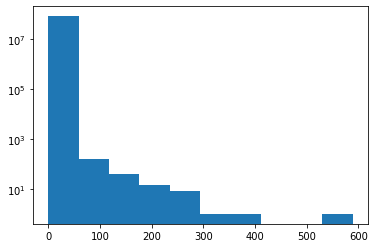

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist, bins_edges, _ = ax.hist(X_train_counts.toarray().reshape(-1),bins=10)
ax.set_yscale('log')

In [3]:
hist, bins_edges = np.histogram(X_train_counts.toarray().reshape(-1),bins=10)
inds = np.digitize(X_train_counts.toarray(),bins_edges) - 1
inds.shape

(2257, 35788)

In [4]:
print(inds.max())
print(inds.min())

10
0


In [9]:
u = np.unique(X_train_counts.toarray())
u.shape

(163,)

In [22]:
X_train_counts == 1

<2257x35788 sparse matrix of type '<class 'numpy.bool_'>'
	with 258423 stored elements in Compressed Sparse Row format>

In [24]:
print(len(X_train_counts.data == 1))
print(len(X_train_counts.toarray() == 1))

365886
2257


In [28]:
hist, bin_edges = np.histogram(np.array([[1,2,2,4,4,3],[1,2,2,4,5,3]]),bins=5)
bin_edges

array([1. , 1.8, 2.6, 3.4, 4.2, 5. ])

In [96]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 

np.random.seed(12723)

n_features = 5
max_occ = 10
N = 10
n_classes = 3
X_train = np.random.randint(0,max_occ,(N,n_features))
y_train = np.random.randint(0,n_classes,(N,))
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
print(X_train)
print(y_train)

[[5 6 5 9 8]
 [1 6 7 4 9]
 [2 0 7 1 1]
 [0 9 3 1 1]
 [0 2 6 9 2]
 [9 8 4 8 3]
 [2 0 6 5 9]
 [2 0 0 7 5]
 [9 8 9 7 0]
 [7 3 8 6 5]]
[0 2 0 1 1 2 1 0 0 1]


In [115]:
classifier2 = BernoulliNB()
X_train2 = np.empty((0,n_features))
y_train2 = np.empty((0,1))
for i in range(N):
    for j in range(n_features):
        temp = np.zeros((X_train[i,j],n_features))
        temp[:,j] = 1
        X_train2 = np.vstack((X_train2,temp))
        y_train2 = np.vstack((y_train2,np.zeros((X_train[i,j],1))+y_train[i]))

In [117]:
classifier2.fit(X_train2,y_train2.reshape(-1))
classifier2.__dict__

{'alpha': 1.0,
 'binarize': 0.0,
 'fit_prior': True,
 'class_prior': None,
 'classes_': array([0., 1., 2.]),
 'class_count_': array([91., 84., 59.]),
 'feature_count_': array([[18., 14., 21., 24., 14.],
        [ 9., 14., 23., 21., 17.],
        [10., 14., 11., 12., 12.]]),
 'feature_log_prob_': array([[-1.58816051, -1.82454929, -1.44155704, -1.31372367, -1.82454929],
        [-2.1517622 , -1.7462971 , -1.27629347, -1.36330484, -1.56397554],
        [-1.71297859, -1.40282366, -1.62596721, -1.54592451, -1.54592451]]),
 'class_log_prior_': array([-0.94446161, -1.02450432, -1.37778367])}

In [94]:
feature_count_ = np.zeros((n_classes,n_features))
for i in range(n_classes):
    for j in range(n_features):
        feature_count_[i,j] = X_train[y_train == i,j].sum()
        
feature_count_

array([[18., 14., 21., 24., 14.],
       [ 9., 14., 23., 21., 17.],
       [10., 14., 11., 12., 12.]])

In [118]:
classifier.__dict__

{'alpha': 1.0,
 'fit_prior': True,
 'class_prior': None,
 'classes_': array([0, 1, 2]),
 'class_count_': array([4., 4., 2.]),
 'feature_count_': array([[18., 14., 21., 24., 14.],
        [ 9., 14., 23., 21., 17.],
        [10., 14., 11., 12., 12.]]),
 'feature_log_prob_': array([[-1.61990921, -1.85629799, -1.47330574, -1.34547237, -1.85629799],
        [-2.18605128, -1.78058617, -1.31058254, -1.39759392, -1.59826461],
        [-1.76098781, -1.45083288, -1.67397643, -1.59393373, -1.59393373]]),
 'class_log_prior_': array([-0.91629073, -0.91629073, -1.60943791])}

In [78]:
np.log((classifier.feature_count_ + 1) \
       / (classifier.class_count_.reshape(-1,1) + n_features))

array([[-0.35667494, -0.22314355, -0.69314718, -0.22314355, -0.10536052],
       [-2.07944154, -0.47000363, -0.28768207, -0.13353139, -0.28768207],
       [-0.33647224, -0.55961579, -1.25276297, -0.55961579, -0.55961579]])

In [60]:
(X_train[y_train == 0,:] == 3).sum()


4